In [7]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Building a Robot Simulator in 2D

 Our robot can observe the world and itself using sensors. In this case, we assume that the robot can sense its location, so at any time step, the sensor reading $\boldsymbol{y}(t)$ measures the robot location $\boldsymbol{y}(t)=\boldsymbol{p}(t)$.

In [8]:
# Perfect sensor
def sense(x):
    return x

### Euler integration
The dynamics of the robot assume that the robot control input alters the robot velocity, which is the derivative of the state vector, i.e.,
$$
\dot{\boldsymbol{x}} = \boldsymbol{u}
$$

In [9]:
def simulate(Δt, x, u):
    # The control input is equal to the velocity of the robot
    dx = array(u)
    
    # Euler integration
    x += Δt * dx
    return x

### Controller for One Target

In [10]:
def control_1(t, p):
    
    ux = 0.0
    uy = 0.0
  
    ux = 3-p[0]
    uy = 3-p[1]
   
    return array([ux, uy])

### Run Simulator for One Target

In [11]:
tf = 15.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval

# Initial conditions
x = array([1., 2.])
x_log = [copy(x)]

for t in time:
    p = sense(x)
    u = control_1(t, p)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

### Controller for Multiple Targets

In [70]:
def control_2(t, p):
    
    targets = ([-2.9,2.9], [3.,-3.], [3.,3.], [0.,0.])
    K = 1
    
    ux = 0.0
    uy = 0.0
    
    if t < 3:
        ux = K*(targets[0][0]-p[0])
        uy = K*(targets[0][1]-p[1])
    elif t >= 3 and t < 6:
        ux = K*(targets[1][0]-p[0])
        uy = K*(targets[1][1]-p[1])
    elif t >=6 and t < 9:
        ux = K*(targets[2][0]-p[0])
        uy = K*(targets[2][1]-p[1])
    else:
        ux = K*(targets[3][0]-p[0])
        uy = K*(targets[3][1]-p[1])
        
    return array([ux, uy])

### Run Simulator for Multiple Targets

In [71]:
tf = 15.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval

# Initial conditions
x = array([-3., -3.])
x_log = [copy(x)]

for t in time:
    p = sense(x)
    u = control(t, p)
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

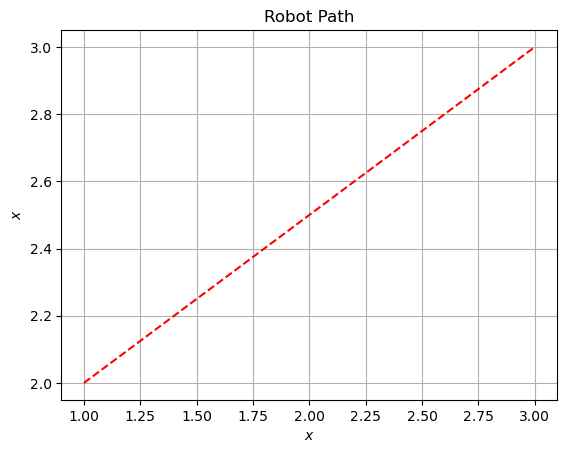

In [12]:
# Draw the robot path based on the log of the state vector
fig, ax = plt.subplots()
ax.plot(x_log[:,0], x_log[:,1], 'r--')
ax.set(title="Robot Path", xlabel="$x$", ylabel="$x$")
ax.grid()

NameError: name 'time' is not defined

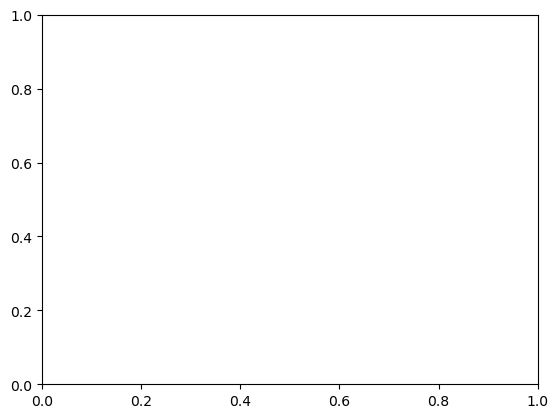

In [5]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()

def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
    plot(x_log[t,0], x_log[t,1], 'bo')
    
    

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())